In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 4*xs - 5*zs + 9 + noise

np.savez('TF_first_example', inputs = generated_inputs, targets = generated_targets)

## Role of TensorFlow 


In [3]:
training_data = np.load('TF_first_example.npz')

In [11]:
input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )                       
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 84.9909 - 640ms/epoch - 20ms/step
Epoch 2/100
32/32 - 0s - loss: 3.0112 - 156ms/epoch - 5ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6227 - 171ms/epoch - 5ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4027 - 141ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3801 - 127ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3690 - 61ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3665 - 47ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4137 - 93ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3887 - 31ms/epoch - 977us/step
Epoch 10/100
32/32 - 0s - loss: 0.4131 - 78ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3757 - 31ms/epoch - 976us/step
Epoch 12/100
32/32 - 0s - loss: 0.3867 - 47ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3585 - 110ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4084 - 62ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3986 - 46ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.4001 - 78ms/epoch 

## Weights and bias(es) extraction

In [12]:
model.layers[0].get_weights()

[array([[ 3.9552283],
        [-4.988797 ]], dtype=float32),
 array([9.0253525], dtype=float32)]

In [13]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 3.9552283],
       [-4.988797 ]], dtype=float32)

In [14]:
bias = model.layers[0].get_weights()[1]
bias

array([9.0253525], dtype=float32)

## Time to predict

In [15]:
MP = model.predict_on_batch(training_data['inputs']).round(1)

TD = training_data['targets'].round(1)
TD

array([[-62.2],
       [ 41.2],
       [-12.9],
       [ 80.9],
       [-27.6],
       [-23.6],
       [-11.1],
       [  8.2],
       [  3.1],
       [-36.2],
       [  8.7],
       [ 41.5],
       [-21.9],
       [ 76.6],
       [ 27.8],
       [ 75.7],
       [  1.5],
       [  3.8],
       [-14.1],
       [  4.2],
       [ 79. ],
       [-30.3],
       [-32.6],
       [-43.7],
       [-54.5],
       [ 73.9],
       [ 18.4],
       [ 13. ],
       [ -5. ],
       [-13.8],
       [ 34.5],
       [-35.6],
       [ 52.4],
       [ 37.2],
       [-41.8],
       [-37. ],
       [ 36.5],
       [ 72.3],
       [-33.8],
       [-38.2],
       [ 24.8],
       [-37.9],
       [  1.6],
       [-46.5],
       [  9.7],
       [ 17.3],
       [-43.3],
       [-51.3],
       [ 18.1],
       [ -7.2],
       [-23.1],
       [ -5.1],
       [  6.9],
       [-19.3],
       [-11.5],
       [ 54.6],
       [ 36.7],
       [-26.1],
       [ -3.1],
       [-21. ],
       [-26. ],
       [ 62.9],
       [

In [16]:
LastDF = np.column_stack((MP,TD))

LastDFP = pd.DataFrame(LastDF, columns=['MP', 'TD'])

LastDFP

,MP,TD
0,-61.299999,-62.2
1,41.500000,41.2
2,-13.100000,-12.9
3,80.199997,80.9
4,-26.500000,-27.6
...,...,...
995,-39.700001,-40.0
996,12.100000,12.3
997,-13.700000,-13.4
998,33.299999,34.2


## Plotting the data

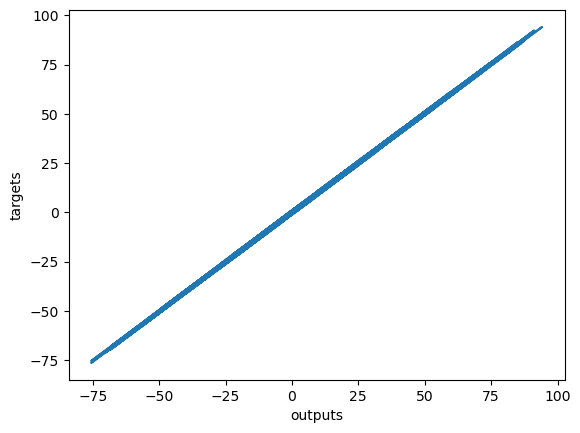

In [17]:
plt.plot(np.squeeze(MP), np.squeeze(TD))

plt.xlabel('outputs')
plt.ylabel('targets')

plt.show()